# Mall Customer Segmentation
This notebook is to practice clustering using real-world data and solving real-world problem. 

This notebook will utilize clustering approach to identify high value customer for mall. 

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.6f' % x)
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

In [2]:
# Install PyDrive for downloading the dataset from google drive
#!pip install -U -q PyDrive

In [3]:
# Mount Google Drive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [4]:
# Download file
#file_id = '1GG-eBV4uDsXijh5mujXq4JqclcIqkohc' # URL id. 
#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('Mall_Customers.csv')

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.columns = ['CustomerID','Gender','Age','Annual Income','Spending Score']

df.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual Income     200 non-null int64
Spending Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset is clean, no null values, and simple. Let's go to Exploratory Data Analysis. 

## Exploratory Data Analysis

Female    112
Male       88
Name: Gender, dtype: int64


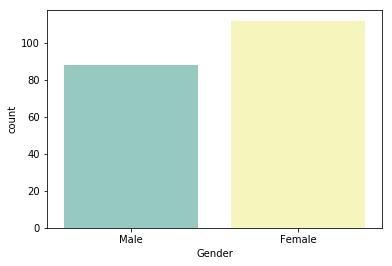

In [9]:
ax = sns.countplot(x='Gender', data=df, palette='Set3')

gender_count = df['Gender'].value_counts()
print(gender_count.sort_index(ascending = True))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



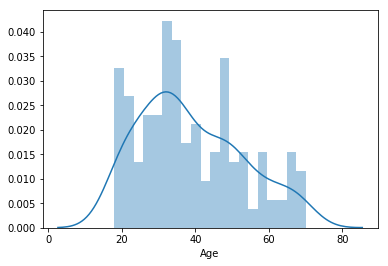

In [10]:
ax = sns.distplot(df['Age'], bins=20)

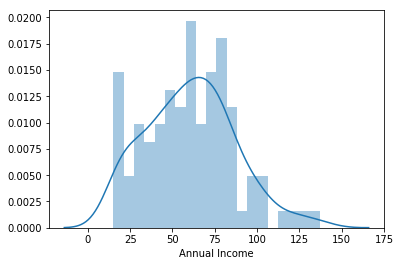

In [11]:
ax = sns.distplot(df['Annual Income'], bins=20)

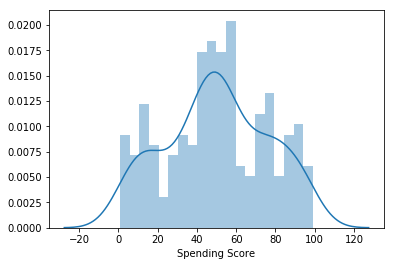

In [12]:
ax = sns.distplot(df['Spending Score'], bins=20)

## Cluster
This dataset is relatively simple, so we will first use K-mean to cluster the dataset, and then find out how many clusters are suitable, and find out what each group is representing at the end. 

### Elbow Method

In [13]:
# Create X
X = df[['Age','Annual Income','Spending Score']]

([<matplotlib.axis.XTick at 0x1da178f6f28>,
 <a list of 10 Text xticklabel objects>)

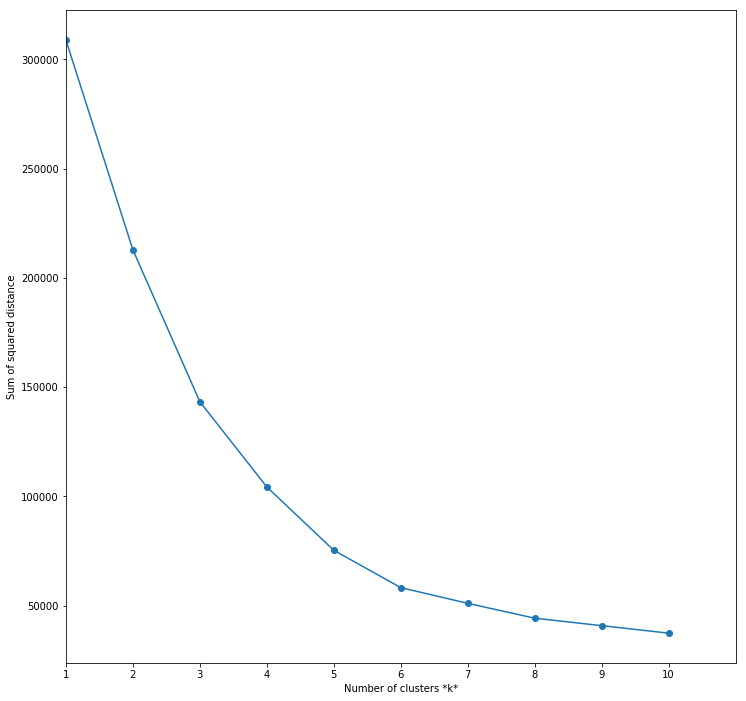

In [14]:
sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(12, 12))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.xlim(1, 11)
plt.xticks(np.arange(1, 11, 1))

### Silhouette Score

In [15]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

sil_score_mean = []

for i in range(2,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=1000, random_state=42)
    km.fit(X)
    labels = km.labels_
    sil_score_mean.append(metrics.silhouette_score(X, labels, metric='euclidean'))

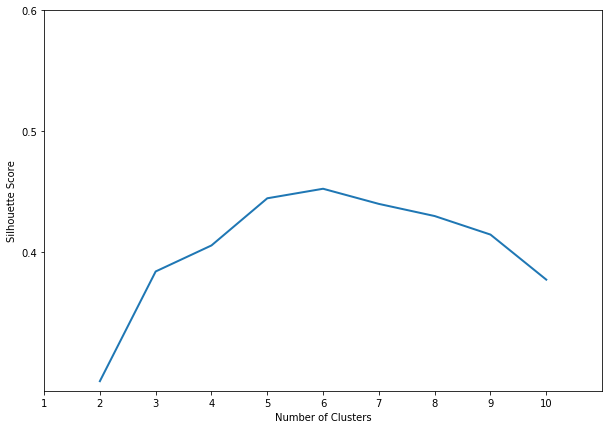

In [16]:
num_cluster = [2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(10,7))
plt.plot(num_cluster,sil_score_mean, lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xlim(1, 11)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0.4, 0.7, 0.1))
plt.show()

After checking both elbow method and Silhoutte scores, we can see that 6 clusters is optimal number of clusters for this dataset. Next, we will plot these 6 clusters in a 3 dimensional space. 

## Plot Clusters

In [22]:
trace = go.Scatter3d(
    mode = 'markers',
    showlegend=True,
    x = df['Age'], y = df['Annual Income'], z = df['Spending Score'],
    marker = dict(color=km.labels_,size=5,line=dict(color=km.labels_,width=12)),
    opacity=0.8
)

layout = go.Layout(
    title = '3D clustering',
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Annual Income'),
        zaxis = dict(title='Spending Score')
    )
)
fig = go.Figure(data=[trace], layout=layout)
py.offline.iplot(fig)

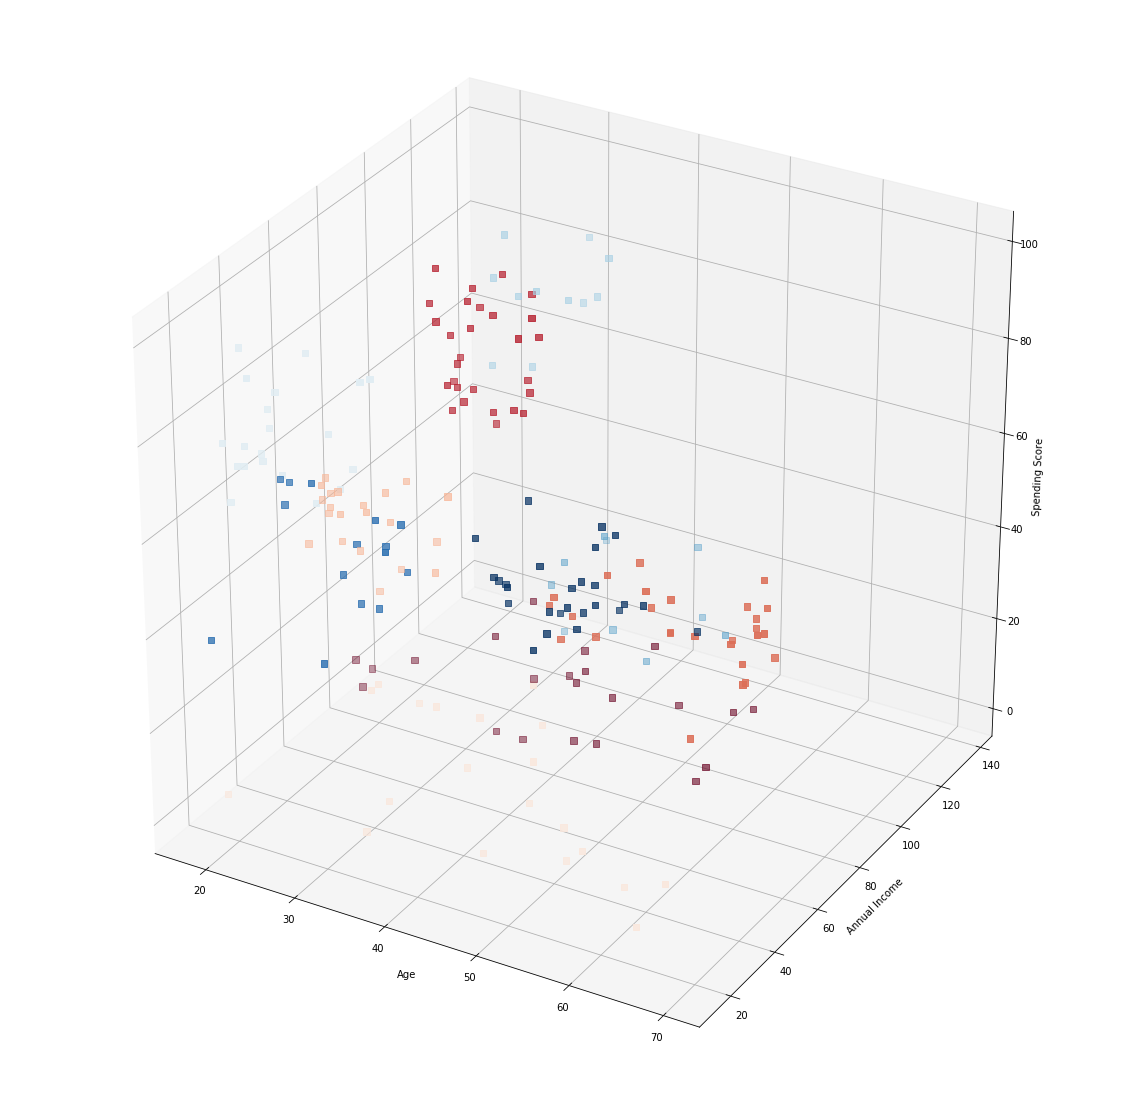

In [19]:
# Added a 3D plot at matplotlib for reference. 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Age'])
y = np.array(df['Annual Income'])
z = np.array(df['Spending Score'])

ax.scatter(x,y,z, marker="s", c=km.labels_, s=40, cmap="RdBu")

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()